In [1]:
library(ISLR)
attach(Wage)

In [3]:
fit=lm(wage~poly(age,4),data = Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


In [4]:
fit2=lm(wage~poly(age,4,raw = 4),data = Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = 4)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = 4)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = 4)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = 4)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [6]:
fit2a=lm(wage~age+I(age ^2)+I(age ^3)+I(age ^4) ,data=Wage)
coef(summary(fit2a))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
age,2.124552e+01,5.886748e+00,3.609042,0.0003123618
I(age^2),-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
I(age^3),6.810688e-03,3.065931e-03,2.221409,0.0263977518
I(age^4),-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [7]:
fit2b=lm(wage~cbind(age ,age ^2, age ^3, age ^4) ,data=Wage)

In [8]:
agelims=range(age)
age.grid=seq(from = agelims[1],to = agelims[2])
preds=predict(fit,newdata = list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)

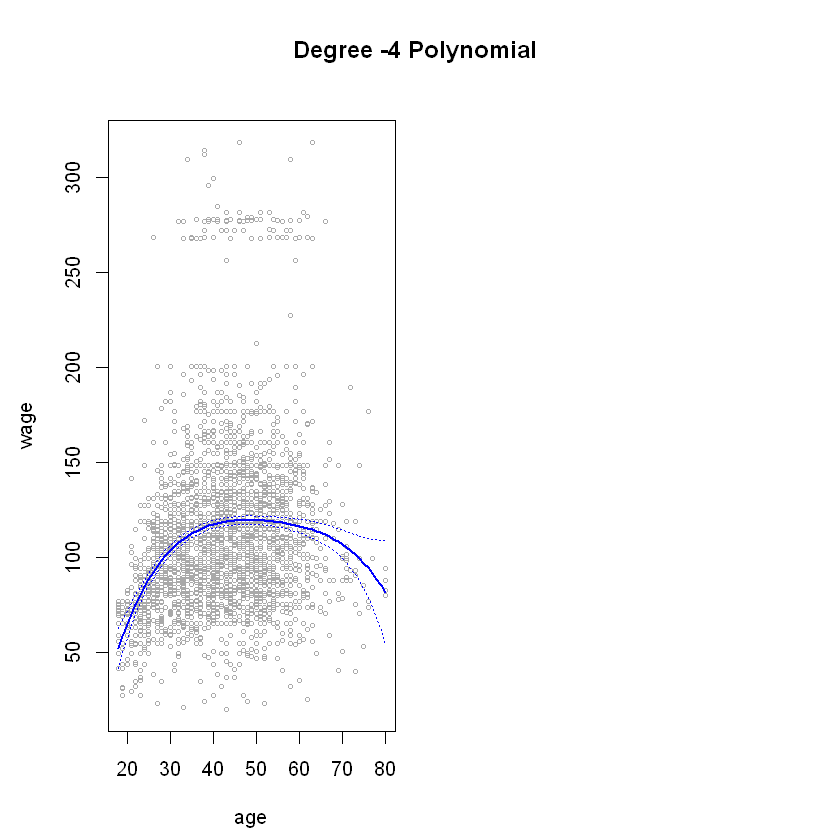

In [13]:
par(mfrow = c(1, 2), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
plot(age, wage, xlim = agelims, cex = 0.5, col = "darkgrey")
title("Degree -4 Polynomial ", outer = T)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [14]:
preds2=predict(fit2,newdata = list(age=age.grid),se=TRUE)
max(abs(preds$fit-preds2$fit))

[1] 7.81597e-11

In [15]:
fit.1 <- lm(wage ~ age, data = Wage)
fit.2 <- lm(wage ~ poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ poly(age, 3), data = Wage)
fit.4 <- lm(wage ~ poly(age, 4), data = Wage)
fit.5 <- lm(wage ~ poly(age, 5), data = Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2998,5022216,NA,NA,NA,NA
2,2997,4793430,1,228786.010,143.5931074,2.367734e-32
3,2996,4777674,1,15755.694,9.8887559,1.679213e-03
4,2995,4771604,1,6070.152,3.8098134,5.104623e-02
5,2994,4770322,1,1282.563,0.8049758,3.696820e-01


In [16]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


In [17]:
fit.1 <- lm(wage ~ education + age, data = Wage)
fit.2 <- lm(wage ~ education + poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ education + poly(age, 3), data = Wage)
anova(fit.1, fit.2, fit.3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2994,3867992,NA,NA,NA,NA
2,2993,3725395,1,142597.10,114.696898,2.728971e-26
3,2992,3719809,1,5586.66,4.493588,3.410431e-02


In [19]:
fit=glm(I(wage>250)~poly(age,4),data = Wage,family = binomial)
preds=predict(fit,newdata = list(age=age.grid),se=TRUE)

In [25]:
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
se.bands=exp(se.bands.logit)/(1+ exp(se.bands.logit))
preds=predict(fit,newdata =list(age=age.grid),type="response",se=T)

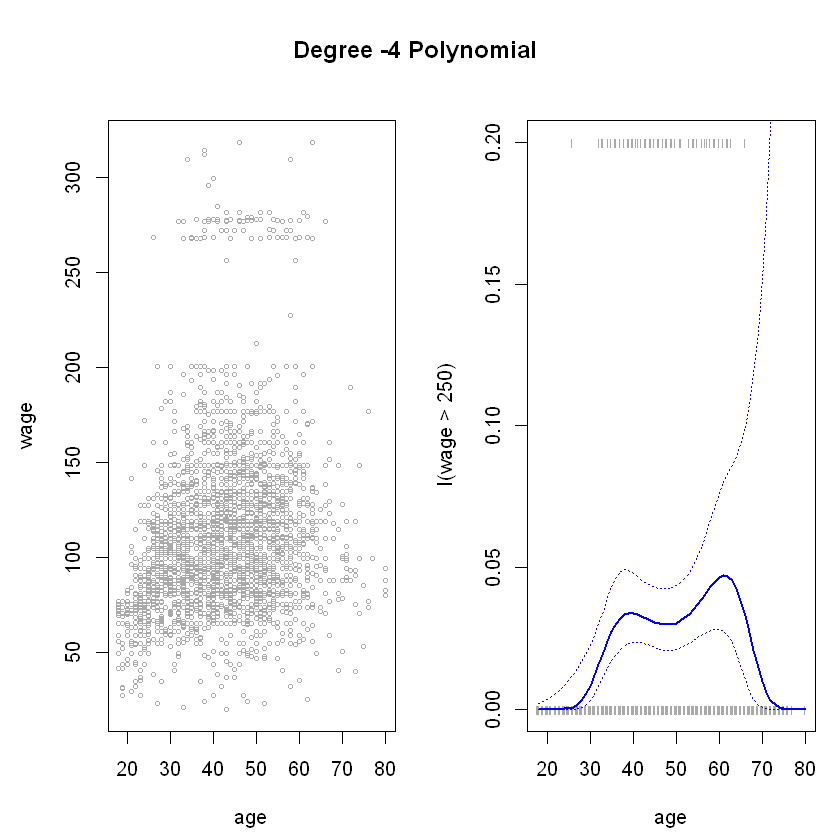

In [27]:
par(mfrow = c(1, 2), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
plot(age, wage, xlim = agelims, cex = 0.5, col = "darkgrey")
title("Degree -4 Polynomial ", outer = T)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

plot(age, I(wage > 250), xlim = agelims, type = "n", ylim = c(0, 0.2))
points(jitter(age), I((wage > 250)/5), cex = 0.5, pch = "|", col = " darkgrey ")
lines(age.grid, pfit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [28]:
table(cut(age,4))
fit=lm(wage~cut(age,4),data = Wage)
coef(summary(fit))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


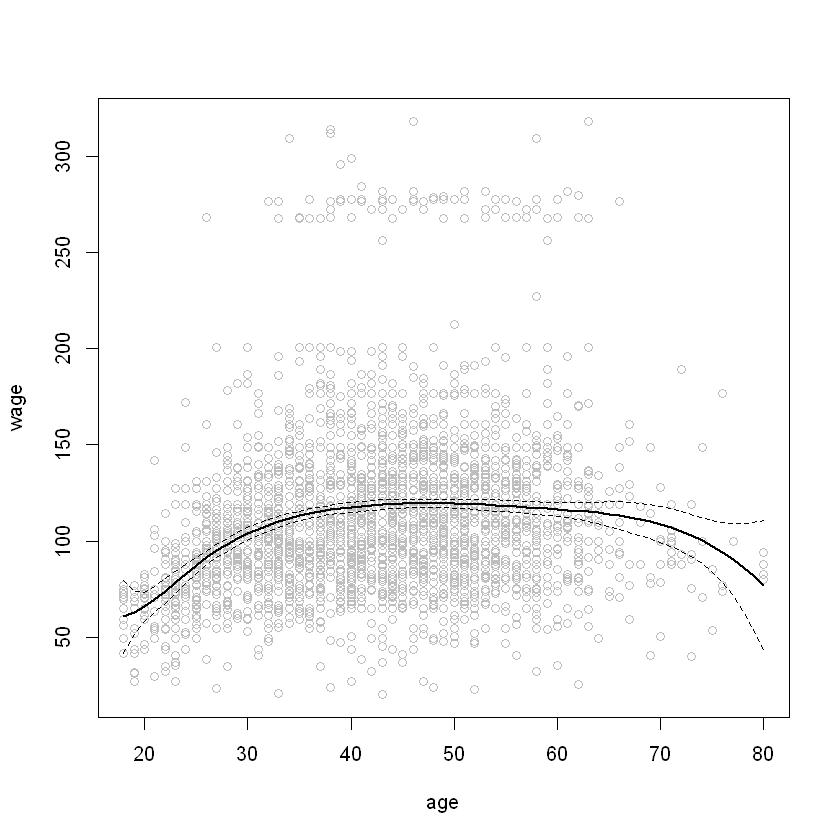

In [30]:
library(splines)
fit <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
pred <- predict(fit, newdata = list(age = age.grid), se = T)
plot(age, wage, col = "gray")
lines(age.grid, pred$fit, lwd = 2)
lines(age.grid, pred$fit + 2 * pred$se, lty = "dashed")
lines(age.grid, pred$fit - 2 * pred$se, lty = "dashed")

In [31]:
dim(bs(age,knots = c(25,40,60)))

[1] 3000    6

In [32]:
dim(bs(age,df = 6))

[1] 3000    6

In [33]:
attr(bs(age,df = 6),"knots")

25%   50%   75% 
33.75 42.00 51.00

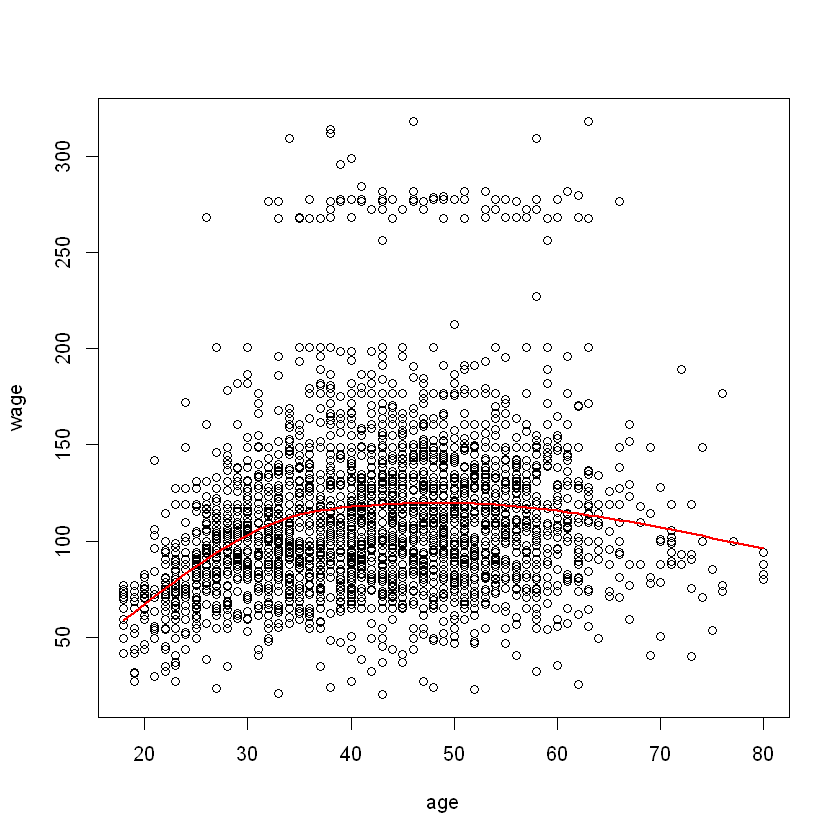

In [35]:
plot(age,wage)
fit2=lm(wage~ns(age,df = 4),data = Wage)
pred2=predict(fit2,newdata = list(age=age.grid),se=T)
lines(age.grid,pred2$fit,col = "red",lwd = 2)

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"


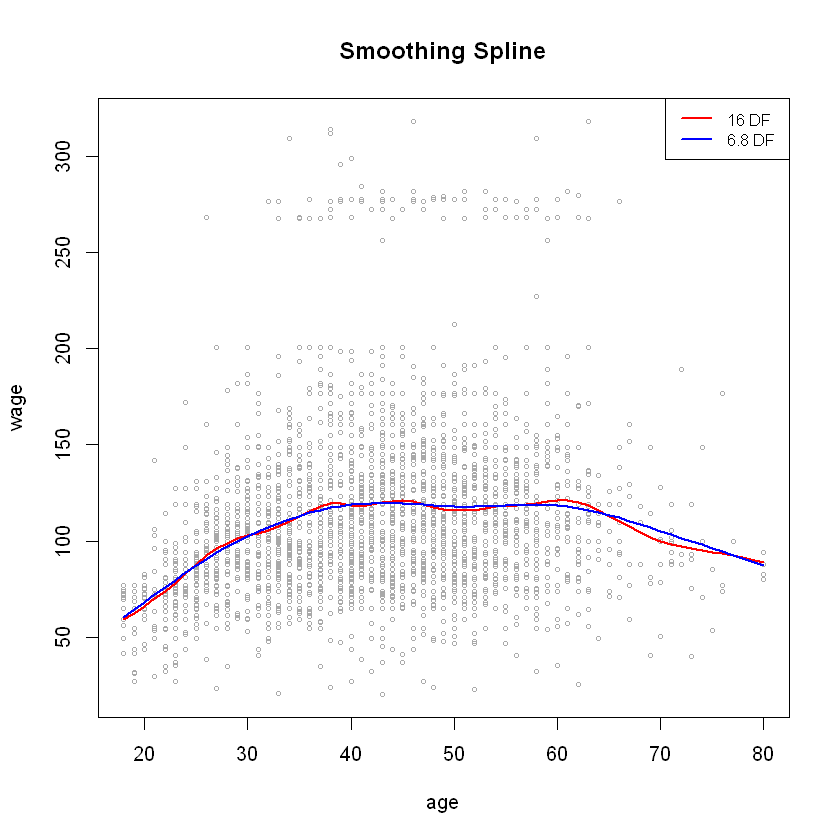

In [37]:
plot(age, wage, xlim = agelims, cex = 0.5, col = "darkgrey")
title(" Smoothing Spline ")
fit <- smooth.spline(age, wage, df = 16)
fit2 <- smooth.spline(age, wage, cv = TRUE)
lines(fit, col = "red", lwd = 2)
lines(fit2, col = "blue", lwd = 2)
legend("topright", legend = c("16 DF", "6.8 DF"), col = c("red", "blue"), lty = 1, lwd = 2, cex = 0.8)

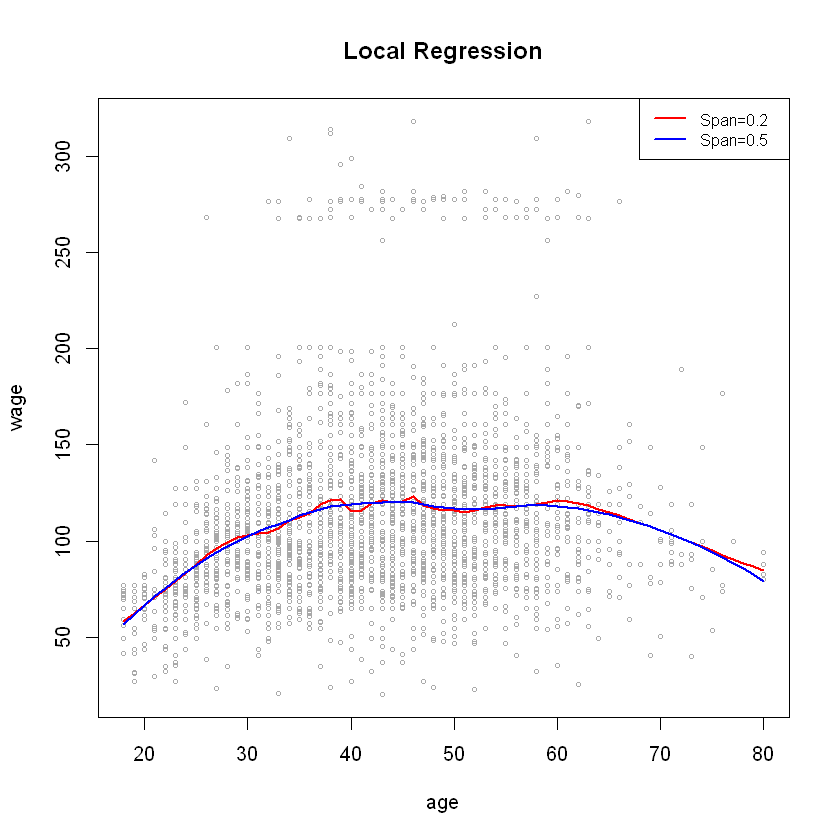

In [38]:
plot(age, wage, xlim = agelims, cex = 0.5, col = "darkgrey")
title(" Local Regression ")
fit <- loess(wage ~ age, span = 0.2, data = Wage)
fit2 <- loess(wage ~ age, span = 0.5, data = Wage)
lines(age.grid, predict(fit, data.frame(age = age.grid)), col = "red", lwd = 2)
lines(age.grid, predict(fit2, data.frame(age = age.grid)), col = "blue", lwd = 2)
legend("topright", legend = c("Span=0.2", "Span=0.5"), col = c("red", "blue"), lty = 1, lwd = 2, cex = 0.8)